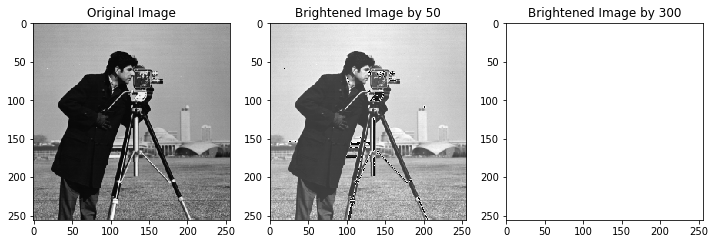

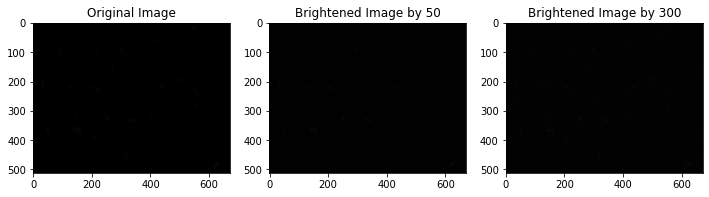

247 247
1748 1748 1748


In [4]:
import numpy as np
from scipy import misc
import imageio
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    # by just adding const to every px of the image
    pic = pic + brightness
    return pic

# Read the image
cameraman_origin = imageio.imread('cameraman.tif')
echo_org = imageio.imread('echo.tif')

# Create a copy of the origina image for us to manipulate
cameraman_bright = copy.deepcopy(cameraman_origin)
cameraman_300 = copy.deepcopy(cameraman_origin)

echo_50 = copy.deepcopy(echo_org)
echo_300 = copy.deepcopy(echo_org)

# Call imadd to perform enhancement
cameraman_bright = imadd(cameraman_bright,50)
cameraman_300 = imadd(cameraman_300, 300)
echo_50 = imadd(echo_50,50)
echo_300 = imadd(echo_300, 300)


# Show the results
plt.figure(figsize = (12,6))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(132)
plt.title('Brightened Image by 50')
plt.imshow(cameraman_bright,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(133)
plt.title('Brightened Image by 300')
plt.imshow(cameraman_300,cmap='gray',vmin = 0, vmax = 255)
plt.show()

plt.figure(figsize = (12,6))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(echo_org,cmap='gray',vmin = 0, vmax = 65535)
plt.subplot(132)
plt.title('Brightened Image by 50')
plt.imshow(echo_50,cmap='gray',vmin = 0, vmax = 65535)
plt.subplot(133)
plt.title('Brightened Image by 300')
plt.imshow(echo_300,cmap='gray',vmin = 0, vmax = 65535)
plt.show()

print(len(np.unique(cameraman_origin)), len(np.unique(cameraman_bright)))
print(len(np.unique(echo_org)), len(np.unique(echo_50)), len(np.unique(echo_300)))

What is the dynamic range (the number of distinct pixel values in an image) of the orginal and the enhanced image?
What will happen if we increase brightness by 300.
Could you enhance the quality of the image eco.tif by simply increasing its brightness?

max_val_im <= max_val of each datatype
for the typical DR definition: difference between the darkest and lightest tones in an image

DR of the original image = [min_val_im ,max_val_im] ; 
DR of the enhanced image = [enhace_amount + min_val_im, max_val_im] ; 

As for the distinct pixels in these 2 images, we can find it through len(np.unique)(printed in the bottom of the images)

For uint8, its max_val is 255, so the image will end up all white after enhanced by 300 because it reaches the max value.
For uint16, its max_val is 65535, therefore by enhancing 300 for each pixel doesn't make any obvious effect to the image.

I have tried to enhance it by 40000 to each pixel in eco.tif, the image ended up with same color.
However, when I tried plt.imshow(echo_org,cmap='gray',vmin = 0, vmax = 255), it got a pretty decent result.
It might due to the low contrast between each pixels, and could be resolve by scaling [min_val_im, max_val_im]

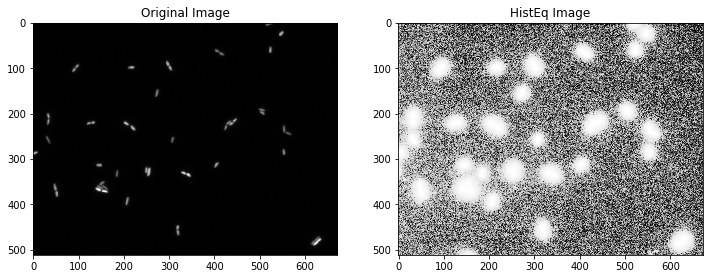

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage import exposure
import copy
%matplotlib inline


# Read the image
eco_origin = imageio.imread('echo.tif')
eco_histeq = copy.deepcopy(eco_origin)
# Apply Histogram Equalization here!
eco_histeq = exposure.equalize_hist(eco_histeq)

# Show the results
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(eco_origin,cmap='gray')
plt.subplot(122)
plt.title('HistEq Image')
plt.imshow(eco_histeq,cmap='gray')
plt.show()

Can you improve the result of enhancement by repeating the histogram equalization? Why?


Nope, since that each pixel of the image will have same value after histogram_eq for 2 times

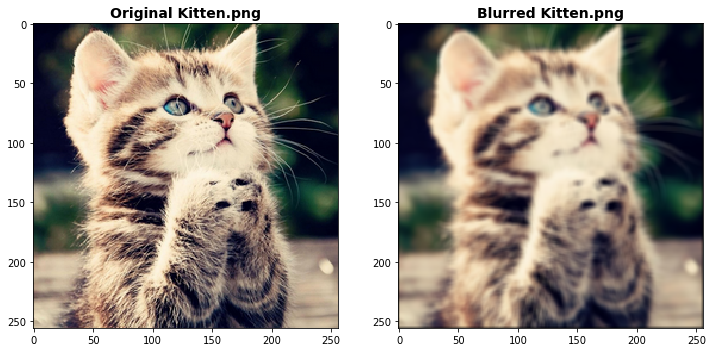

In [56]:
import numpy
import imageio
from scipy import signal
import matplotlib.pyplot as plt

# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = numpy.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = numpy.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / numpy.sum(kernel)
    return kernel

# Read Image and Display
kitten_origin = imageio.imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur = copy.deepcopy(kitten_origin)
# Generate Kernel
kernel = gengaussian(5)
# Apply Convolution Here!
for i in range(0,3):
    kitten_blur[:, :, i] = signal.convolve2d(kitten_blur[:, :, i], kernel, mode = 'same')
    

# Display Results
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.title('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)
plt.subplot(122)
plt.title('Blurred Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur,vmin = 0, vmax = 255)
plt.show()